# Analysis 4

# To find the quarterly profits of the carriers for every year

/Users/Sneha/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Sneha/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:44: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


                        CARRIER_NAME  YEAR  QUARTER CARRIER  CURR_ASSETS  \
4941               Southern Air Inc.  2015        2      9S     12403.57   
1785                Compass Airlines  2007        3      CP      3686.00   
4797                   Sky King Inc.  2012        2     SLQ     13150.63   
2762  Freedom Airlines d/b/a HP Expr  2004        3      F8        51.70   
2763  Freedom Airlines d/b/a HP Expr  2004        4      F8        11.19   

      FLIGHT_EQUIP    ASSETS  CURR_LIABILITIES  NON_REC_LIAB  DEF_CREDITS  \
4941       1155.99 -19706.51          14501.48       5062.27          0.0   
1785        466.00  -5423.00           2625.00          0.00          0.0   
4797          0.00  14282.85          -9373.44     -11476.48          0.0   
2762       6739.60   7036.67            286.90     -10648.29        160.0   
2763       7247.02   7239.72             92.88     -10841.92        386.0   

      Percent_profits  
4941       418.267596  
1785       306.530291  
4797    

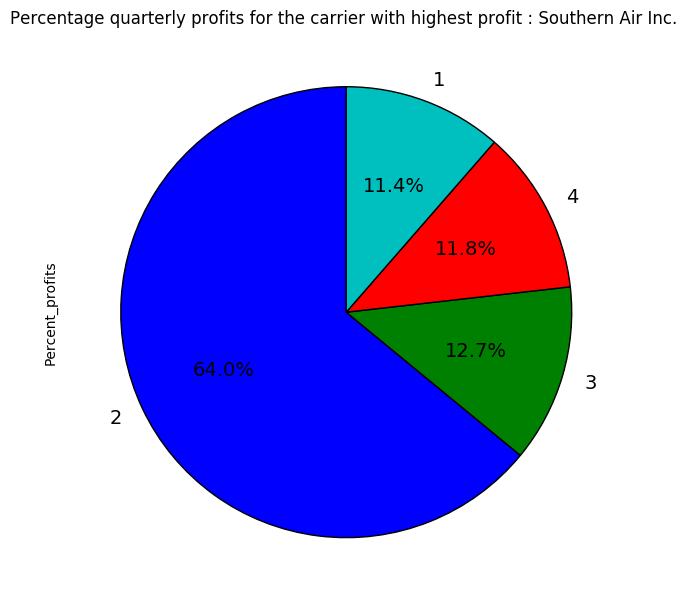

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
##Reading the CSV file from the disk
loc='/Users/Sneha/Downloads/Final_dataset.csv'
loc1='/Users/Sneha/Downloads/Carrier_finances.csv'

carrier_data=pd.read_csv(loc1)

#Filling all the NAN values in float columns to 0.0
carrier_data['CURR_ASSETS'].fillna(0.0,inplace=True)
carrier_data['FLIGHT_EQUIP'].fillna(0.0,inplace=True)
carrier_data['ASSETS'].fillna(0.0,inplace=True)
carrier_data['CURR_LIABILITIES'].fillna(0.0,inplace=True)
carrier_data['NON_REC_LIAB'].fillna(0.0,inplace=True)
carrier_data['DEF_CREDITS'].fillna(0.0,inplace=True)
data= pd.read_csv(loc)

#Filling the NAN with 0 for DepTime and ArrTime columns
data['DepTime'].fillna(0,inplace=True)
data['ArrTime'].fillna(0,inplace=True)

#Convert the columns to int
data.DepTime=data.DepTime.astype(int)
data.ArrTime=data.ArrTime.astype(int)
data=data[['Origin','Dest','UniqueCarrier','FlightNum','Distance']]

#Groupby based on carrier
data=data.groupby(['Origin','UniqueCarrier','Dest','FlightNum','Distance']).size().reset_index()
carrier_data=carrier_data.groupby(['CARRIER_NAME','YEAR','QUARTER','CARRIER']).sum().reset_index()

#Function to calculate profits
def per_of_assets(v):
    tot_assets=v[4]+v[5]+v[6]
    tot_liabilities=v[7]+v[8]+v[9]
    if tot_assets!=0:
        per_of_profits=((tot_assets-tot_liabilities)/tot_assets)*100
        return per_of_profits
    else:
        return 0

#calling the function to calculate percent profits
carrier_data['Percent_profits']=carrier_data.apply(per_of_assets,axis=1)
carrier_data=carrier_data.sort(['Percent_profits'], ascending=[False] )
print(carrier_data.head())
p=carrier_data.head(1)
x= p['CARRIER_NAME']
#print(x)
fina=carrier_data[carrier_data['CARRIER_NAME']=='Southern Air Inc.']
final=fina[fina['YEAR']==2015]
#print(final)

#Plot pie chart
plt.figure(figsize=(16,8))
 #plot chart
ax1 = plt.subplot(121, aspect='equal')
final.plot(kind='pie', y = 'Percent_profits', ax=ax1, autopct='%1.1f%%',
 startangle=90, shadow=False, labels=final['QUARTER'], legend = False, fontsize=14)
plt.title('Percentage quarterly profits for the carrier with highest profit : Southern Air Inc. ')
plt.savefig('/Users/Sneha/Downloads/Plot_Analysis_4.png')
plt.show()

#Merge with another csv file to get name of carrier
m= pd.merge(data,carrier_data,left_on='UniqueCarrier',right_on='CARRIER')
m=m[['Origin','UniqueCarrier','Dest','Distance','CARRIER_NAME','YEAR','QUARTER','Percent_profits']]
#print(m.head())

#Writing to csv file
m.to_csv("output_Analysis_4.csv",index = False)

